In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import patsy
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [338]:
df = pd.read_csv('C:/Users/Asus/Desktop/output1.csv')

In [339]:
df.head(10)

,prod_name,prod_comp,prod_price,prod_rating,prod_feature
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",Marka: MSI,"2.597,40",617 değerlendirme,Oyunlar
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,Marka: Samsung,"1.713,80",2 değerlendirme,Oyun
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",Marka: LG,"2.761,74",91 değerlendirme,Kişisel Kullanım
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",Marka: LG,"2.829,01",19 değerlendirme,"Multimedya, Kişisel, Oyun"
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",Marka: LG,"2.096,90",72 değerlendirme,Kişisel Kullanım
5,ASUS Proart PA32UCX-PK 32 4K MINILed I...,Marka: ASUS,NaN,3 değerlendirme,"Kişisel, Ofis"
6,"ASUS VT168N 15,6 Led 1366x768 10MS Dvı...",Marka: ASUS,"2.452,55",171 değerlendirme,Eğitim
7,"Philips 275E1S 27"" 4ms 75Hz FreeSync Q...",Marka: Philips,"3.667,90",1 değerlendirme,75
8,Samsung 27 inç T55 Dahili Hoparlörlü Ç...,Marka: Samsung,"2.712,31",3 değerlendirme,75
9,"LG 35WN73A-B: 35'' Monitör, 21:9, Ultr...",Marka: LG,"5.951,99",NaN,100 Hz


In [340]:
query = df['prod_comp'].unique()
query

array(['Marka: MSI', 'Marka: Samsung', 'Marka: LG', 'Marka: ASUS',
       'Marka: Philips', 'Marka: BenQ', 'Marka: Lenovo',
       'Marka: Viewsonic', 'Marka: Dell', 'Marka: Rampage', 'Marka: HP',
       'Marka: GameBooster', 'Marka: NS NIGHTSILVER', 'Marka: HANNSPREE',
       'Marka: GIGABYTE', 'Marka: CENOVA', 'Marka: Cocar',
       'Marka: WIMAXIT', 'Marka: Acer', 'Marka: AOC',
       'Marka: Power Boost', 'Marka: LG Electronics', 'Marka: PERFORMAX',
       'Marka: Xiaomi', 'Marka: Silvercrest', 'Marka: ANDYCINE',
       'Marka: Philips Monitors', 'Marka: Junluck', 'Marka: iiyama',
       'Marka: N\\C', 'Marka: Unbekannt', 'Marka: TURBOX',
       'Marka: TV Logic', 'Marka: iTek', 'Marka: Funien', 'Marka: 01',
       'Marka: Smartwares', 'Marka: GOLMAR', 'Marka: Nitze',
       'Marka: MILLENIUM', 'Marka: Nilox', 'Marka: Huangyu',
       'Marka: Yoidesu', 'Marka: HP - PC', 'Marka: Honorall',
       'Marka: Sunydog', 'Marka: MAYIS', 'Marka: Goolfly', 'Marka: EIZO',
       'Marka: Dell 

In [341]:
query2 = df['prod_comp'].value_counts()
query2

Marka: Lenovo        24
Marka: ASUS          23
Marka: Samsung       23
Marka: LG            17
Marka: Dell          16
                     ..
Marka: Jingyi         1
Marka: Zwbfu          1
Marka: GOLMAR         1
Marka: Smartwares     1
Marka: 01             1
Name: prod_comp, Length: 77, dtype: int64

In [342]:
for i in range(len(df)):
    for j in range(len(query)):
        if (df['prod_comp'][i] == query[j]) & (query2[j] < 3):
            df['prod_comp'][i] = 'Marka: Other '
        else : 
            df['prod_comp'][i] = df['prod_comp'][i]

In [343]:
df['prod_comp'].value_counts()

Marka: Diğer             98
Marka: Lenovo            24
Marka: ASUS              23
Marka: Samsung           23
Marka: LG                17
Marka: Acer              16
Marka: AOC               16
Marka: Dell              16
Marka: Philips           15
Marka: HP                12
Marka: MSI               10
Marka: Viewsonic          9
Marka: LG Electronics     7
Marka: BenQ               7
Marka: HANNSPREE          7
Marka: GIGABYTE           4
Marka: Rampage            3
Marka: Cocar              3
Marka: Power Boost        3
Marka: NS NIGHTSILVER     2
Marka: PERFORMAX          2
Marka: CENOVA             1
Marka: GameBooster        1
Marka: WIMAXIT            1
Name: prod_comp, dtype: int64

In [344]:
df['prod_comp'].replace({"Marka: WIMAXIT": "Marka: Other", "Marka: PERFORMAX": "Marka: Other", "Marka: CENOVA" : "Marka: Other","Marka: GameBooster" : "Marka: Other","Marka: NS NIGHTSILVER" : "Marka: Other"},inplace = True)

In [273]:
df2 = pd.get_dummies(df,columns=['prod_comp'])

In [274]:
df

,prod_name,prod_comp,prod_price,prod_rating,prod_feature
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",Marka: MSI,"2.597,40",617 değerlendirme,Oyunlar
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,Marka: Samsung,"1.713,80",2 değerlendirme,Oyun
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",Marka: LG,"2.761,74",91 değerlendirme,Kişisel Kullanım
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",Marka: LG,"2.829,01",19 değerlendirme,"Multimedya, Kişisel, Oyun"
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",Marka: LG,"2.096,90",72 değerlendirme,Kişisel Kullanım
...,...,...,...,...,...
315,Acer UM.QS0EE.A01 İnce Çerçeveli Moni...,Marka: Acer,NaN,229 değerlendirme,75 Hz
316,LG 49SM5KE-B 125 cm 49 inç LFD 16:9 19...,Marka: LG Electronics,NaN,NaN,49 İnç
317,ELO TouchSystems ET1523L-2UWA-1-S-ST-B...,Marka: Diğer,"17.819,42",NaN,NaN
318,HP E24q G4 24 inç IPS QHD E-Serisi E24...,Marka: Diğer,NaN,NaN,24 İnç


In [348]:
df['prod_feature'] = df['prod_feature'].str.strip()

In [349]:
df['prod_feature'].unique()

array(['Oyunlar', 'Oyun', 'Kişisel Kullanım', 'Multimedya, Kişisel, Oyun',
       'Kişisel, Ofis', 'Eğitim', '75', '100 Hz', 'Iş', '75 Hz',
       'Fotoğraf Düzenleme, İş', 'Oyun.', '60',
       'Multimedya, Kişisel, Ofis', 'Fotoğraf Düzenleme', '165', '165 Hz',
       '28 İnç', 'Oyunlar, Video işleme, Programlama', 'İş', '60 Hz',
       'CENOVA', '120', 'Dell', 'Cocar', 'Video işleme',
       'Kişisel., Oyun.', 'Multimedya', 'Power Boost', '144 Hz', 'ASUS',
       'Samsung', 'Lenovo', nan, 'Philips', 'PERFORMAX', 'Junluck',
       'İş, oyun, kişisel', 'Unbekannt', 'Programlama',
       'Oyun., Multimedya.', 'Iiyama', '5.5 İnç', '01', '240 Hz',
       'GOLMAR', 'Oyunlar, Kişisel., Multimedya.', 'Kişisel, Oyun, İş',
       '27.5 İnç', 'Oyun, Video Düzenleme', 'Kişisel., Multimedya., İş',
       'Video Düzenleme, İş', 'Nilox', '76.', 'HP', 'Yatay/Dikey',
       'Yoidesu', 'MAYIS', '144.', 'Kişisel., İş', 'Sunydog', 'Kişisel',
       'Conpoir', 'Goolfly', 'Fesjoy', 'NEC', 'CARALL', 'Displ

In [350]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Video Düzenleme':
        df['prod_feature'][i] = 'Video işleme'
    elif df['prod_feature'][i] == '76 Hz, 70 Hz':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'VGA, HDMI':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '24 İnç':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'HANNSPREE':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '100.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Elo Touch Solution':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Elo49 İnç':
        df['prod_feature'][i] = 'Kişisel'

In [351]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Eğitim, iş, kişisel':
        df['prod_feature'][i] = 'İş'
    elif df['prod_feature'][i] == 'Oyunlar, Kişisel., İş':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'MicroScreen':
        df['prod_feature'][i] = 'Video Düzenleme'
    elif df['prod_feature'][i] == 'Kişisel, Ofis, Oyun':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Kişisel, İş':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '100.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Elo Touch Solution':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '60.':
        df['prod_feature'][i] = 'Kişisel'

In [352]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Iş':
        df['prod_feature'][i] = 'İş'
    elif df['prod_feature'][i] == '144.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'DisplayPort':
        df['prod_feature'][i] = 'Video Düzenleme'
    elif df['prod_feature'][i] == 'AVANTRON':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '8 GB':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '100.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Oyun, İş':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '75.':
        df['prod_feature'][i] = 'Kişisel'

In [353]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Fotoğraf Düzenleme, İş':
        df['prod_feature'][i] = 'İş'
    elif df['prod_feature'][i] == '144':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Sunydog':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Conpoir':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Goolfly':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Fesjoy':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'NEC':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'CARALL':
        df['prod_feature'][i] = 'Kişisel'

In [354]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == '240 Hz':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'GOLMAR':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Oyunlar, Kişisel., Multimedya.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Kişisel, Oyun, İş':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '27.5 İnç':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Oyun, Video Düzenleme':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Kişisel., İş':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Multimedya.':
        df['prod_feature'][i] = 'Multimedya'

In [355]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Cocar':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Kişisel., Oyun.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Power Boost':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Unbekannt':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Oyun., Multimedya.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '5.5 İnç':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Iiyama':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '01':
        df['prod_feature'][i] = 'Kişisel'

In [356]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == '144 Hz':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'ASUS':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Samsung':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Lenovo':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Philips':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'PERFORMAX':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'İş, oyun, kişisel':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Junluck':
        df['prod_feature'][i] = 'Kişisel'

In [357]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Oyunlar':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Kişisel Kullanım':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Multimedya, Kişisel, Oyun':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Kişisel, Ofis':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Kişisel Kullanım':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '75':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '100 Hz':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '75 Hz':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Oyun.':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '60':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Kişisel Kullanım':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '75':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Multimedya, Kişisel, Ofis':
        df['prod_feature'][i] = 'Multimedya'
    elif df['prod_feature'][i] == '165':
         df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '165 Hz':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '28 İnç':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Oyunlar, Video işleme, Programlama':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == '60 Hz':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'CENOVA':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '75 Hz':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '120':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Dell':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == ' Cocar ':
        df['prod_feature'][i] = 'Kişisel'

In [358]:
for i in range(len(df['prod_feature'])):
    if df['prod_feature'][i] == 'Kişisel., Multimedya., İş':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Video Düzenleme, İş':
        df['prod_feature'][i] = 'İş'
    elif df['prod_feature'][i] == 'Nilox':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '76.':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'HP':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Yatay/Dikey':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Yoidesu':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'MAYIS':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == '49 İnç':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Elo':
        df['prod_feature'][i] = 'Oyun'
    elif df['prod_feature'][i] == 'Neovo':
        df['prod_feature'][i] = 'Kişisel'
    elif df['prod_feature'][i] == 'Varsayılan':
        df['prod_feature'][i] = 'Kişisel'

In [359]:
df['prod_feature'].unique()

array(['Oyun', 'Kişisel', 'Eğitim', 'İş', 'Multimedya',
       'Fotoğraf Düzenleme', 'Video işleme', nan, 'Programlama',
       'Video Düzenleme'], dtype=object)

In [360]:
df['prod_price'] = df['prod_price'].str.replace('.','')
df['prod_price'] = df['prod_price'].str.replace(',','.')
df['prod_price'] = df['prod_price'].astype(float)

In [362]:
random =pd.Series(random)

In [125]:
df2 = df.copy()

In [277]:
df2.head()

,prod_name,prod_price,prod_rating,prod_feature,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,...,prod_comp_Marka: HP,prod_comp_Marka: LG,prod_comp_Marka: LG Electronics,prod_comp_Marka: Lenovo,prod_comp_Marka: MSI,prod_comp_Marka: Philips,prod_comp_Marka: Power Boost,prod_comp_Marka: Rampage,prod_comp_Marka: Samsung,prod_comp_Marka: Viewsonic
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...","2597,40",617 değerlendirme,Oyunlar,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,"1713,80",2 değerlendirme,Oyun,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...","2761,74",91 değerlendirme,Kişisel Kullanım,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...","2829,01",19 değerlendirme,"Multimedya, Kişisel, Oyun",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...","2096,90",72 değerlendirme,Kişisel Kullanım,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   prod_name                        320 non-null    object
 1   prod_price                       173 non-null    object
 2   prod_rating                      193 non-null    object
 3   prod_feature                     282 non-null    object
 4   prod_comp_Marka: AOC             320 non-null    uint8 
 5   prod_comp_Marka: ASUS            320 non-null    uint8 
 6   prod_comp_Marka: Acer            320 non-null    uint8 
 7   prod_comp_Marka: BenQ            320 non-null    uint8 
 8   prod_comp_Marka: Cocar           320 non-null    uint8 
 9   prod_comp_Marka: Dell            320 non-null    uint8 
 10  prod_comp_Marka: Diğer           320 non-null    uint8 
 11  prod_comp_Marka: GIGABYTE        320 non-null    uint8 
 12  prod_comp_Marka: HANNSPREE       320

In [279]:
df2['prod_price'] = df2['prod_price'].str.replace(',','.')
df2['prod_price'] = df2['prod_price'].astype(float)
#df['prod_price'] = df['prod_price'].replace('.','')

In [283]:
df['prod_price'] = df['prod_price'].str.replace(',','.')
df['prod_price'] = df['prod_price'].astype(float)
#df['prod_price'] = df['prod_price'].replace('.','')

In [134]:
df.loc[df['prod_price']]

KeyError: "None of [Float64Index([  2597.4,   1713.8,  2761.74,  2829.01,   2096.9,      nan,\n               2452.55,   3667.9,  2712.31,  5951.99,\n              ...\n                   nan,   8186.0,      nan,      nan,      nan,      nan,\n                   nan, 17819.42,      nan,      nan],\n             dtype='float64', length=320)] are in the [index]"

In [223]:
del df['prod_price2']

In [135]:
df['prod_price'].mean()

4953.765549132949

In [28]:
df.dtype()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [364]:
df['prod_rating']=df['prod_rating'].str.replace('değerlendirme', '')

In [365]:
df['prod_rating']=df['prod_rating'].astype(float)

In [368]:
random = np.random.randint(3000,6000,size=(2000))
random =pd.Series(random)
random

0       3450
1       5139
2       5775
3       3239
4       3361
        ... 
1995    5516
1996    4647
1997    4072
1998    5677
1999    4164
Length: 2000, dtype: int32

In [369]:
df['prod_price'] = df['prod_price'].fillna(random)
df['prod_rating'] = df['prod_rating'].fillna(112)

In [370]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   prod_name                        320 non-null    object 
 1   prod_price                       320 non-null    float64
 2   prod_rating                      320 non-null    float64
 3   prod_feature                     282 non-null    object 
 4   prod_comp_Marka: AOC             320 non-null    uint8  
 5   prod_comp_Marka: ASUS            320 non-null    uint8  
 6   prod_comp_Marka: Acer            320 non-null    uint8  
 7   prod_comp_Marka: BenQ            320 non-null    uint8  
 8   prod_comp_Marka: Cocar           320 non-null    uint8  
 9   prod_comp_Marka: Dell            320 non-null    uint8  
 10  prod_comp_Marka: Diğer           320 non-null    uint8  
 11  prod_comp_Marka: GIGABYTE        320 non-null    uint8  
 12  prod_comp_Marka: HANNS

In [371]:
df.head()

,prod_name,prod_comp,prod_price,prod_rating,prod_feature
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",Marka: MSI,2597.40,617.0,Oyun
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,Marka: Samsung,1713.80,2.0,Oyun
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",Marka: LG,2761.74,91.0,Kişisel
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",Marka: LG,2829.01,19.0,Kişisel
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",Marka: LG,2096.90,72.0,Kişisel


In [388]:
df2 = pd.get_dummies(df,columns=['prod_comp'])
df2 = pd.get_dummies(df,columns=['prod_feature'])

In [399]:
df2 = pd.get_dummies(df2,columns=['prod_feature'])

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prod_name     320 non-null    object 
 1   prod_comp     320 non-null    object 
 2   prod_price    320 non-null    float64
 3   prod_rating   320 non-null    float64
 4   prod_feature  282 non-null    object 
dtypes: float64(2), object(3)
memory usage: 12.6+ KB


In [404]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   prod_name                        320 non-null    object 
 1   prod_price                       320 non-null    float64
 2   prod_rating                      320 non-null    float64
 3   prod_comp_Marka: AOC             320 non-null    uint8  
 4   prod_comp_Marka: ASUS            320 non-null    uint8  
 5   prod_comp_Marka: Acer            320 non-null    uint8  
 6   prod_comp_Marka: BenQ            320 non-null    uint8  
 7   prod_comp_Marka: Cocar           320 non-null    uint8  
 8   prod_comp_Marka: Dell            320 non-null    uint8  
 9   prod_comp_Marka: Diğer           320 non-null    uint8  
 10  prod_comp_Marka: GIGABYTE        320 non-null    uint8  
 11  prod_comp_Marka: HANNSPREE       320 non-null    uint8  
 12  prod_comp_Marka: HP   

In [405]:
X = df2.iloc[:,2:33]
y = df2.iloc[:,1]

In [410]:
y.mean()

4215.396414062499

In [407]:
df2['prod_price'] = df2['prod_price'].apply(lambda x : df2['prod_price'].mean() if x > 8000 else x)
        
        

In [408]:
df2

,prod_name,prod_price,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",2597.400000,617.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,1713.800000,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",2761.740000,91.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",2829.010000,19.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",2096.900000,72.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Acer UM.QS0EE.A01 İnce Çerçeveli Moni...,3512.000000,229.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
316,LG 49SM5KE-B 125 cm 49 inç LFD 16:9 19...,3532.000000,112.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
317,ELO TouchSystems ET1523L-2UWA-1-S-ST-B...,4692.220125,112.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
318,HP E24q G4 24 inç IPS QHD E-Serisi E24...,3425.000000,112.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [409]:
df2['prod_rating']

0      617.0
1        2.0
2       91.0
3       19.0
4       72.0
       ...  
315    229.0
316    112.0
317    112.0
318    112.0
319    112.0
Name: prod_rating, Length: 320, dtype: float64

In [219]:
X

,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,prod_comp_Marka: GIGABYTE,prod_comp_Marka: HANNSPREE,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,617.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,91.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,19.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,72.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,229.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
316,112.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
317,112.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
318,112.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [411]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y, test_size=0.10, random_state=5)
# Make predictions on validation dataset
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_train)
model.score(X,y)
print(model.score(X,y))
r_squared_error = r2_score(Y_train,predictions)
print(r_squared_error) 

0.12145991605385165
0.14340247529353245


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual_Values vs Predicted_Values')

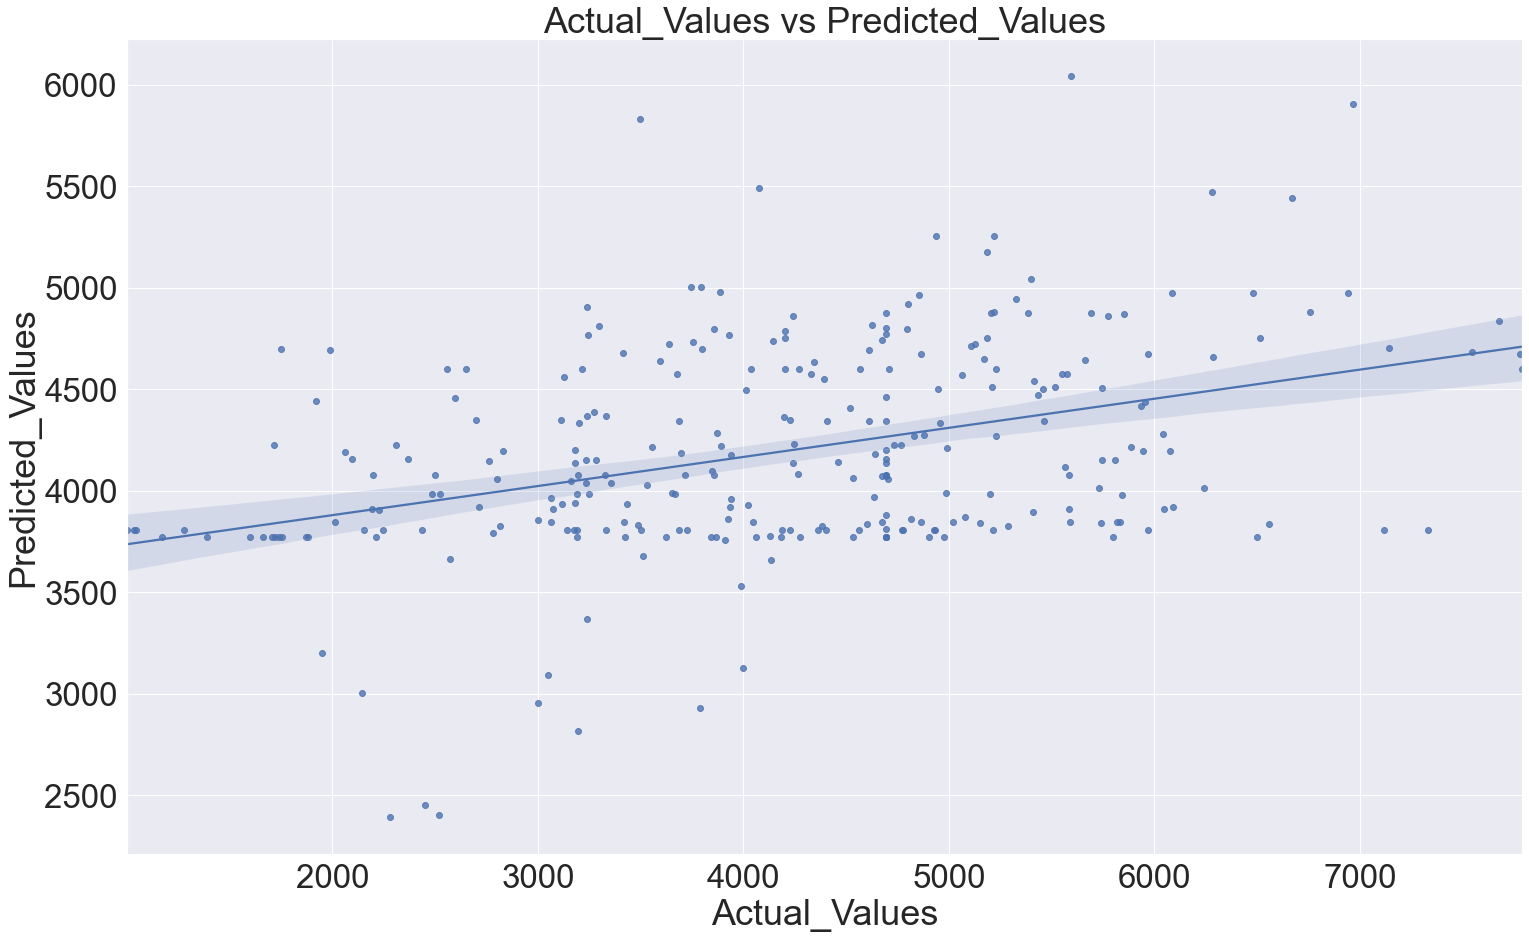

In [412]:
plt.figure(figsize = (25,15))
sns.set(font_scale = 3)
sns.regplot(Y_train,predictions)
plt.xlabel('Actual_Values')
plt.ylabel('Predicted_Values')
plt.title('Actual_Values vs Predicted_Values')


In [413]:
X_train, X_validation, y_train, Y_validation = train_test_split(X,y, test_size=0.20, random_state=5)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [414]:
y_pred= regressor.predict(X)

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(X_test)
y_pred

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
285,4251.00,4543.868276
241,4250.34,3742.203528
252,4126.00,4117.366822
259,5207.00,3908.903300
83,3729.00,4011.920634


In [229]:
X_f = df.loc[:,['prod_comp_Marka: ASUS','prod_comp_Marka: Viewsonic','prod_feature_Multimedya','prod_feature_Oyun','prod_feature_İş']]

In [242]:
X_Asus = df.loc[:,['prod_comp_Marka: ASUS','prod_feature_Kişisel','prod_feature_Multimedya','prod_feature_Oyun','prod_feature_İş']]

In [232]:
x_f = df.iloc[:,2:7]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2, random_state=5)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2, random_state=5)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
#coeff_df

y_pred1 = regressor.predict(X_test)
y_pred1

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df_pred.head()

,Actual,Predicted
285,3175.00,3959.129636
241,4250.34,3959.129636
252,5250.00,4401.934167
259,4546.00,3959.129636
83,3729.00,3959.129636


In [249]:
mse_marka = np.mean((y_test - y_pred1)**2)
mse_marka

2164346.445391027

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_Asus, y, test_size=0.2, random_state=5)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
#coeff_df

y_pred_asus = regressor.predict(X_test)
y_pred_asus

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_asus})
df_pred.head()

,Actual,Predicted
285,3175.00,3951.407731
241,4250.34,3951.407731
252,5250.00,4411.335340
259,4546.00,3951.407731
83,3729.00,3951.407731


In [246]:
mse_asus = np.mean((y_test - y_pred_asus)**2)
mse_asus

2175955.7605428267

In [228]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred1))

NameError: name 'y_pred1' is not defined

In [508]:
mean_squared_error(y_test,y_pred1)

7166743.71282861

In [433]:
model1 = xgb.XGBRegressor(nthread=10)

In [497]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
train_X, test_X, train_y, test_y = train_test_split(X_f, y,
                      test_size = 0.2,random_state = 42)
xgb_r.fit(train_X, train_y)

[01:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [499]:
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
mse = (mean_squared_error(test_y, pred))
print("MSE : % f" %(mse))

[01:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  3224930.009843


In [492]:
from sklearn.metrics import mean_squared_error

from bayes_opt import BayesianOptimization

def xgbc_cv(max_depth,learning_rate,n_estimators,reg_alpha):
    
    estimator_function = xgb.XGBRegressor(max_depth=int(max_depth),
                                           learning_rate= learning_rate,
                                           n_estimators= int(n_estimators),
                                           reg_alpha = reg_alpha,
                                           nthread = -1,
                                          
                                           seed = seed)
    # Fit the estimator
    estimator_function.fit(X_train,y_train)
    

    return 1/mean_squared_error(y_test,estimator_function.predict(X_test))



gp_params = {"alpha": 1e-10}
seed = 112
hyperparameter_space = {
    'max_depth': (1, 150),
    'learning_rate': (0, 1),
    'n_estimators' : (20,300),
    'reg_alpha': (0,1)
}

xgbcBO = BayesianOptimization(f = xgbc_cv, 
                             pbounds =  hyperparameter_space,
                             random_state = 16,
                             verbose = 10)


xgbcBO.maximize(init_points=2,n_iter=50,acq='ucb', kappa= 3, **gp_params)

|   iter    |  target   | learni... | max_depth | n_esti... | reg_alpha |
-------------------------------------------------------------------------
|  1        |  1.256e-0 |  0.2233   |  78.95    |  174.2    |  0.0456   |
|  2        |  1.256e-0 |  0.3607   |  34.24    |  212.8    |  0.1637   |
|  3        |  1.256e-0 |  0.2748   |  34.8     |  214.0    |  0.5872   |
|  4        |  1.256e-0 |  0.6519   |  23.4     |  50.29    |  0.1937   |
|  5        |  1.256e-0 |  0.6424   |  90.54    |  260.7    |  0.5845   |
|  6        |  1.256e-0 |  0.3639   |  37.23    |  213.9    |  0.7925   |
|  7        |  1.256e-0 |  0.4145   |  64.85    |  285.5    |  0.1532   |
|  8        |  1.256e-0 |  0.8526   |  56.26    |  47.57    |  0.0133   |
|  9        |  1.256e-0 |  0.602    |  112.7    |  239.8    |  0.8671   |
|  10       |  1.256e-0 |  0.3583   |  67.84    |  245.0    |  0.9784   |
|  11       |  1.256e-0 |  0.4843   |  59.32    |  295.5    |  0.4577   |
|  12       |  1.256e-0 |  0.7475   | 

In [493]:
optimum_parameter=xgbcBO.max
optimum_parameter["params"]

{'learning_rate': 0.07295923590195397,
 'max_depth': 138.812139599449,
 'n_estimators': 98.80188103071215,
 'reg_alpha': 0.07285152268956585}

In [494]:
xg_reg1 = xgb.XGBRegressor(learning_rate = 0.07295923590195397,
 max_depth= 138,
 n_estimators =98,
 reg_alpha =   0.07285152268956585)

In [495]:
xg_reg1.fit(X_train,y_train)

preds_xg = xg_reg1.predict(X_test)

In [496]:
rmse = np.sqrt(mean_squared_error(y_test, preds_xg))
print("RMSE: %f" % (rmse))
mse= rmse**2
print("MSE: %f" % (mse))

RMSE: 2820.399619
MSE: 7954654.011342


In [455]:
df_corr = df2.corr(method = 'spearman')
df_corr.head()

,prod_price,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,prod_comp_Marka: GIGABYTE,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
prod_price,1.000000,-0.123692,0.046183,0.111214,-0.037490,0.018157,-0.122000,0.045019,-0.154456,-0.029234,...,0.053105,-0.074863,0.093641,-0.100899,0.078978,0.120272,0.034249,-0.075558,-0.003220,0.008662
prod_rating,-0.123692,1.000000,-0.048586,-0.033150,0.002646,-0.019830,-0.055665,0.050831,0.083101,0.058035,...,0.037308,0.073571,0.013840,-0.031374,-0.003241,-0.010091,-0.056665,-0.034810,-0.085140,-0.076572
prod_comp_Marka: AOC,0.046183,-0.048586,1.000000,-0.063842,-0.052632,-0.034308,-0.022318,-0.052632,-0.160324,-0.025811,...,-0.039027,-0.012845,-0.025811,-0.036736,-0.028904,0.100502,-0.012845,-0.018194,-0.018194,0.027471
prod_comp_Marka: ASUS,0.111214,-0.033150,-0.063842,1.000000,-0.063842,-0.041616,-0.027072,-0.063842,-0.194474,-0.031309,...,-0.047340,0.201196,0.186494,0.000387,-0.035060,0.022230,-0.015581,-0.022069,0.131456,-0.045703
prod_comp_Marka: Acer,-0.037490,0.002646,-0.052632,-0.063842,1.000000,-0.034308,-0.022318,-0.052632,-0.160324,-0.025811,...,-0.039027,-0.012845,-0.025811,-0.007347,-0.028904,0.130502,-0.012845,-0.018194,-0.018194,-0.072423


In [457]:
df_marka = df_corr.iloc[:,0:21]

In [470]:
sns.set_style(style='dark')

<AxesSubplot:>

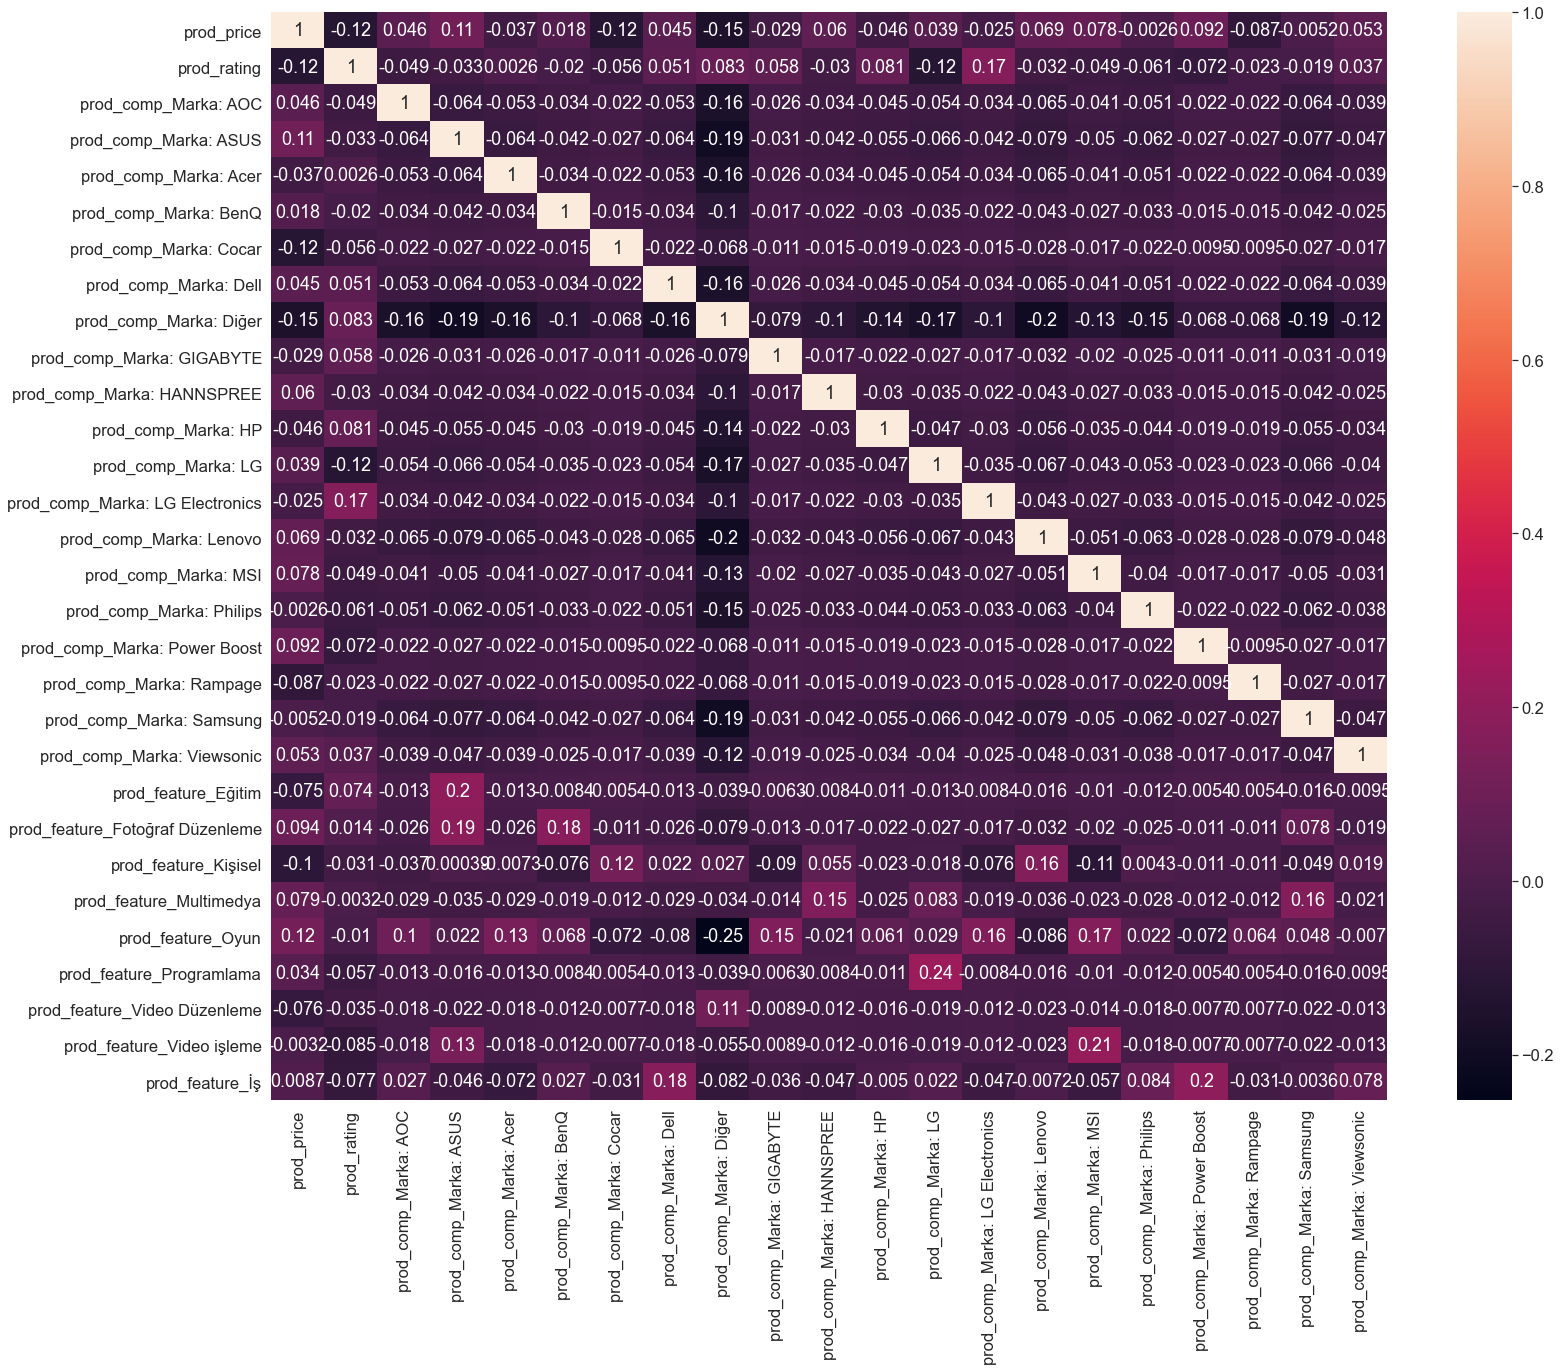

In [471]:
plt.figure(figsize = (25,20))
sns.set(font_scale = 1.5)
sns.heatmap(df_marka,annot = True)

In [473]:
df_feature =df_corr.iloc[:,21:31]

<AxesSubplot:>

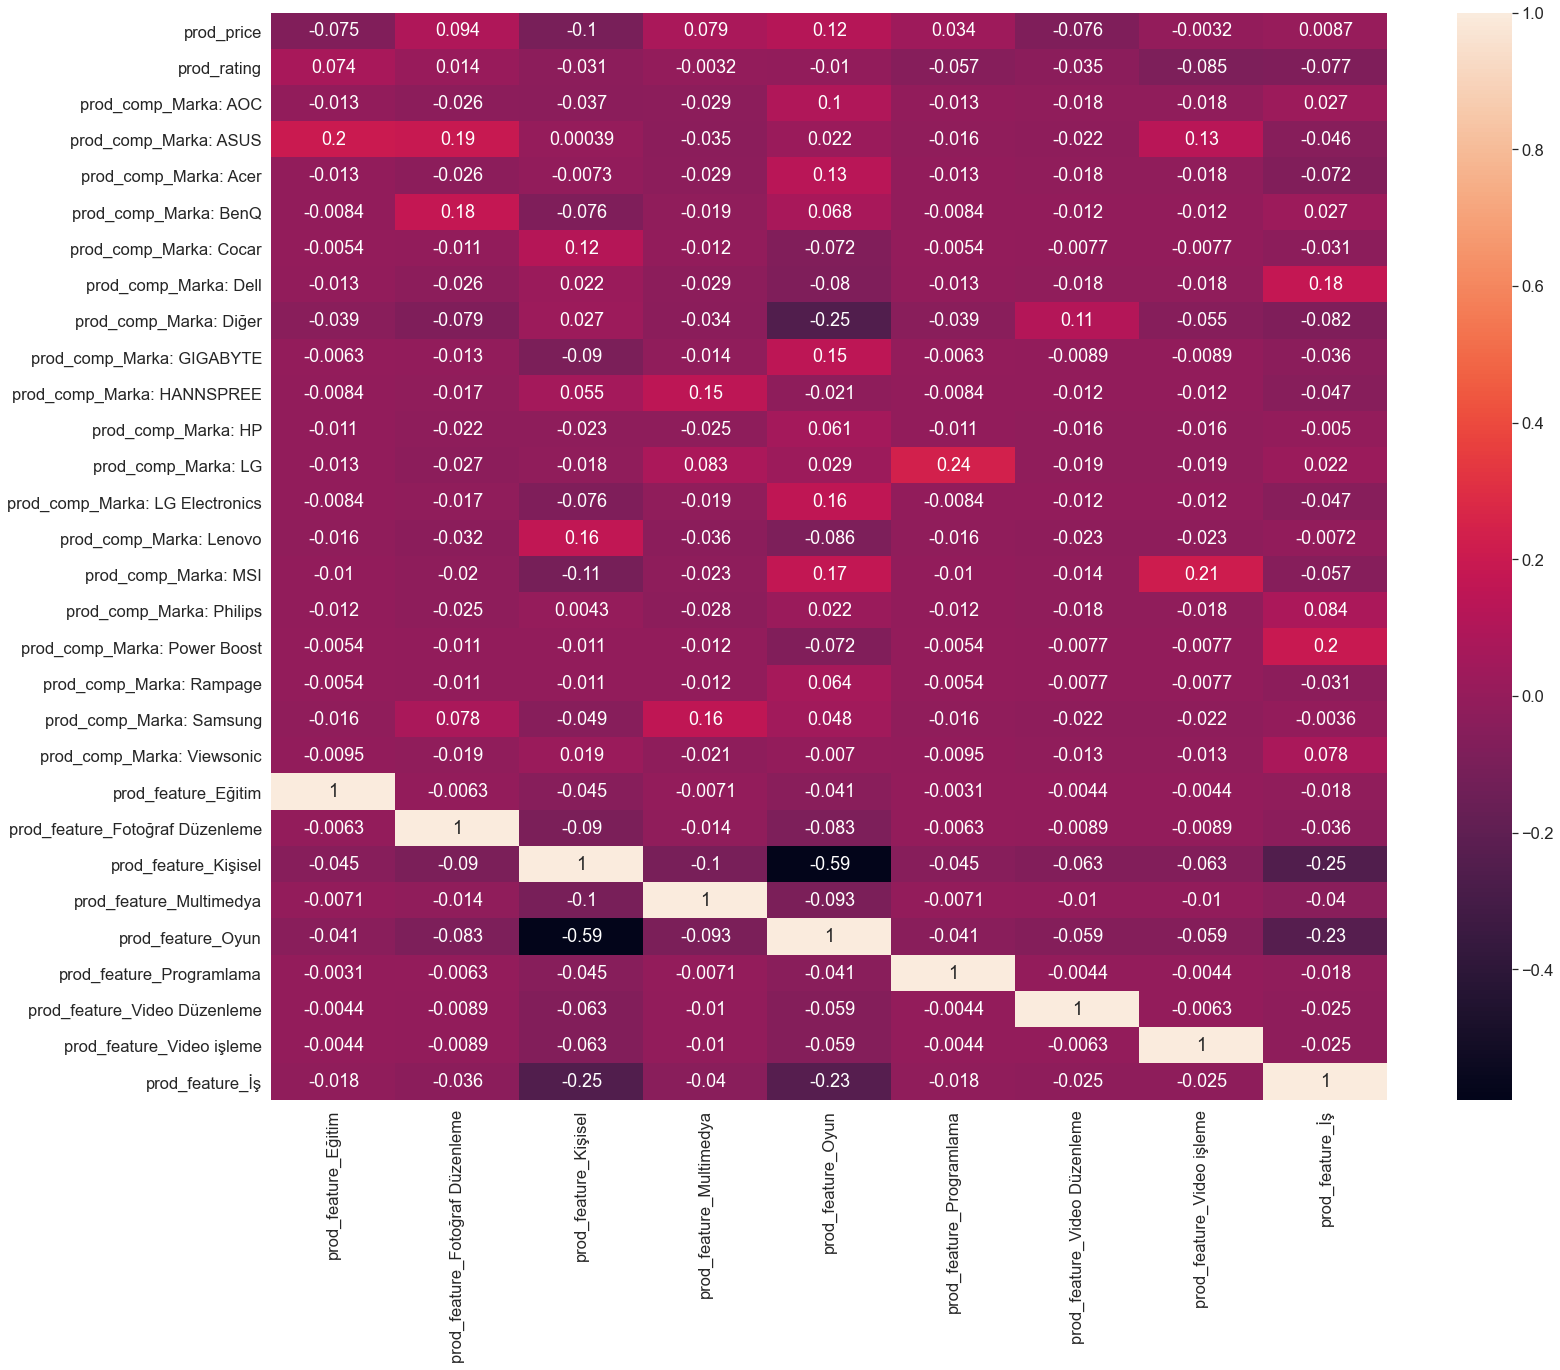

In [474]:
plt.figure(figsize = (25,20))
sns.set(font_scale = 1.5)
sns.heatmap(df_feature,annot = True)

In [398]:
X_f = df.loc[:,['prod_comp_Marka: ASUS','prod_comp_Marka: Viewsonic','prod_feature_Multimedya','prod_feature_Oyun','prod_feature_İş']]

In [399]:
X_f

,prod_comp_Marka: ASUS,prod_comp_Marka: Viewsonic,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_İş
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
315,0,0,0,0,0
316,0,0,0,0,0
317,0,0,0,0,0
318,0,0,0,0,0


In [386]:
df.head()


,prod_name,prod_price,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",2597.40,617.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,1713.80,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",2761.74,91.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",2829.01,19.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",2096.90,72.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [477]:
results = sm.OLS(y, X).fit()

In [476]:
X

,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,prod_comp_Marka: GIGABYTE,prod_comp_Marka: HANNSPREE,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,617.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,91.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,19.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,72.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,229.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
316,112.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
317,112.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
318,112.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [475]:
X_f

,prod_comp_Marka: ASUS,prod_comp_Marka: Viewsonic,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_İş
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
315,0,0,0,0,0
316,0,0,0,0,0
317,0,0,0,0,0
318,0,0,0,0,0


In [478]:
pred_ols = results.predict(X_f)
mse_ols = np.mean((y_test - pred_ols)**2)
mse_ols

ValueError: shapes (320,5) and (29,) not aligned: 5 (dim 1) != 29 (dim 0)

In [479]:
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[75.72406746]]), p=1.7591055926814102e-116, df_denom=291, df_num=28>


In [480]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             prod_price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.615
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0286
Time:                        16:36:20   Log-Likelihood:                -2743.9
No. Observations:                 320   AIC:                             5546.
Df Residuals:                     291   BIC:                             5655.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
prod_ratin

In [367]:
df.head()

,prod_name,prod_price,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ,prod_comp_Marka: Cocar,prod_comp_Marka: Dell,prod_comp_Marka: Diğer,...,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",2597.40,617.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,1713.80,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",2761.74,91.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",2829.01,19.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",2096.90,72.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [372]:
x_f = df.iloc[:,2:7]

In [373]:
x_f

,prod_rating,prod_comp_Marka: AOC,prod_comp_Marka: ASUS,prod_comp_Marka: Acer,prod_comp_Marka: BenQ
0,617.00,0,0,0,0
1,2.00,0,0,0,0
2,91.00,0,0,0,0
3,19.00,0,0,0,0
4,72.00,0,0,0,0
...,...,...,...,...,...
315,229.00,0,0,1,0
316,112.54,0,0,0,0
317,112.54,0,0,0,0
318,112.54,0,0,0,0


In [409]:
model2 = LinearRegression()
model2.fit(X,y)
pred = model2.predict(X)

score = model2.score(X,y)
print("r^2 :",score)

r^2 : 0.11212346522222905


In [410]:
model2.coef_

array([-1.15102898e+00, -2.15785494e+02,  2.02445128e+02, -1.44915383e+02,
       -3.75385622e+02, -2.00634862e+03,  3.17195140e+02,  2.20513106e+01,
       -7.73254720e+02,  5.52233084e+02,  2.78471614e+02, -2.70063515e+02,
       -2.51120574e+02,  2.69754968e+02,  3.72649244e+02,  3.39985114e+02,
        3.45315719e+02, -2.01887349e+03, -2.36932997e+01,  3.37933939e+03,
       -2.79918512e+03,  3.58149191e+02, -5.80961608e+02,  5.49048867e+02,
        1.52124429e+02, -1.53862616e+01, -1.65315283e+03,  4.58831958e+03,
       -5.98956242e+02])

In [411]:
lr = LinearRegression()


In [412]:
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.11212346522222905

In [416]:
pred

array([ 5060.70474473,  5372.24502199,  4290.34719074,  4373.22127705,
        4312.21674129,  4864.1463843 ,  2452.55      ,  5003.98842794,
        4638.00795609,  4998.6400635 ,  4354.80481342,  4375.523335  ,
        4270.44810084,  4805.37251023,  8648.0429729 ,  4815.87211106,
        5582.12087108,  2516.74405138,  5519.3461576 ,  5111.5567663 ,
        5804.21714128,  8776.38270378,  5419.14066133,  5185.16404764,
        5290.7548893 ,  5744.41595676,  5590.32624736,  4388.18465374,
        4866.44844225,  5947.02037688,  4924.06883485,  5769.5383152 ,
        4256.65638692,  4511.92424201,  4557.66885238,  3249.83008829,
        4981.19845414,  2618.51971024,  5290.7548893 , 10034.57860183,
        4589.36819039,  5246.41882286,  4926.8521084 ,  5408.52224224,
        5147.17066652,  5276.09533678,  3378.21586033,  4805.37251023,
        5210.73692459,  5354.97958734,  4805.37251023,  4443.61370409,
        8031.83241825,  4953.5737587 ,  5060.26615491,  4620.38154349,
      

In [250]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1195.0829225472485
Mean Squared Error: 2114862.279407748
Root Mean Squared Error: 1454.2566071391072


In [482]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [483]:
sns.barplot(MAE)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'bool' object has no attribute 'all'

In [256]:
df_feature2 =df.iloc[:,21:31]

In [252]:
df_feature2

,prod_comp_Marka: Viewsonic,prod_feature_Eğitim,prod_feature_Fotoğraf Düzenleme,prod_feature_Kişisel,prod_feature_Multimedya,prod_feature_Oyun,prod_feature_Programlama,prod_feature_Video Düzenleme,prod_feature_Video işleme,prod_feature_İş
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
315,0,0,0,1,0,0,0,0,0,0
316,0,0,0,1,0,0,0,0,0,0
317,0,0,0,1,0,0,0,0,0,0
318,0,0,0,1,0,0,0,0,0,0


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prod_name     320 non-null    object 
 1   prod_comp     320 non-null    object 
 2   prod_price    320 non-null    float64
 3   prod_rating   320 non-null    float64
 4   prod_feature  282 non-null    object 
dtypes: float64(2), object(3)
memory usage: 12.6+ KB


In [442]:
df_group_fea =df.groupby('prod_feature').mean()

In [420]:
df_group_fea.head()

,prod_price,prod_rating
prod_feature,,
Eğitim,2452.550000,171.000000
Fotoğraf Düzenleme,5357.380000,265.543250
Kişisel,4482.756720,97.105912
Multimedya,5206.802000,84.600000
Oyun,5043.688584,127.782097


<AxesSubplot:xlabel='Specific Uses For Product', ylabel='Price & Ratings'>

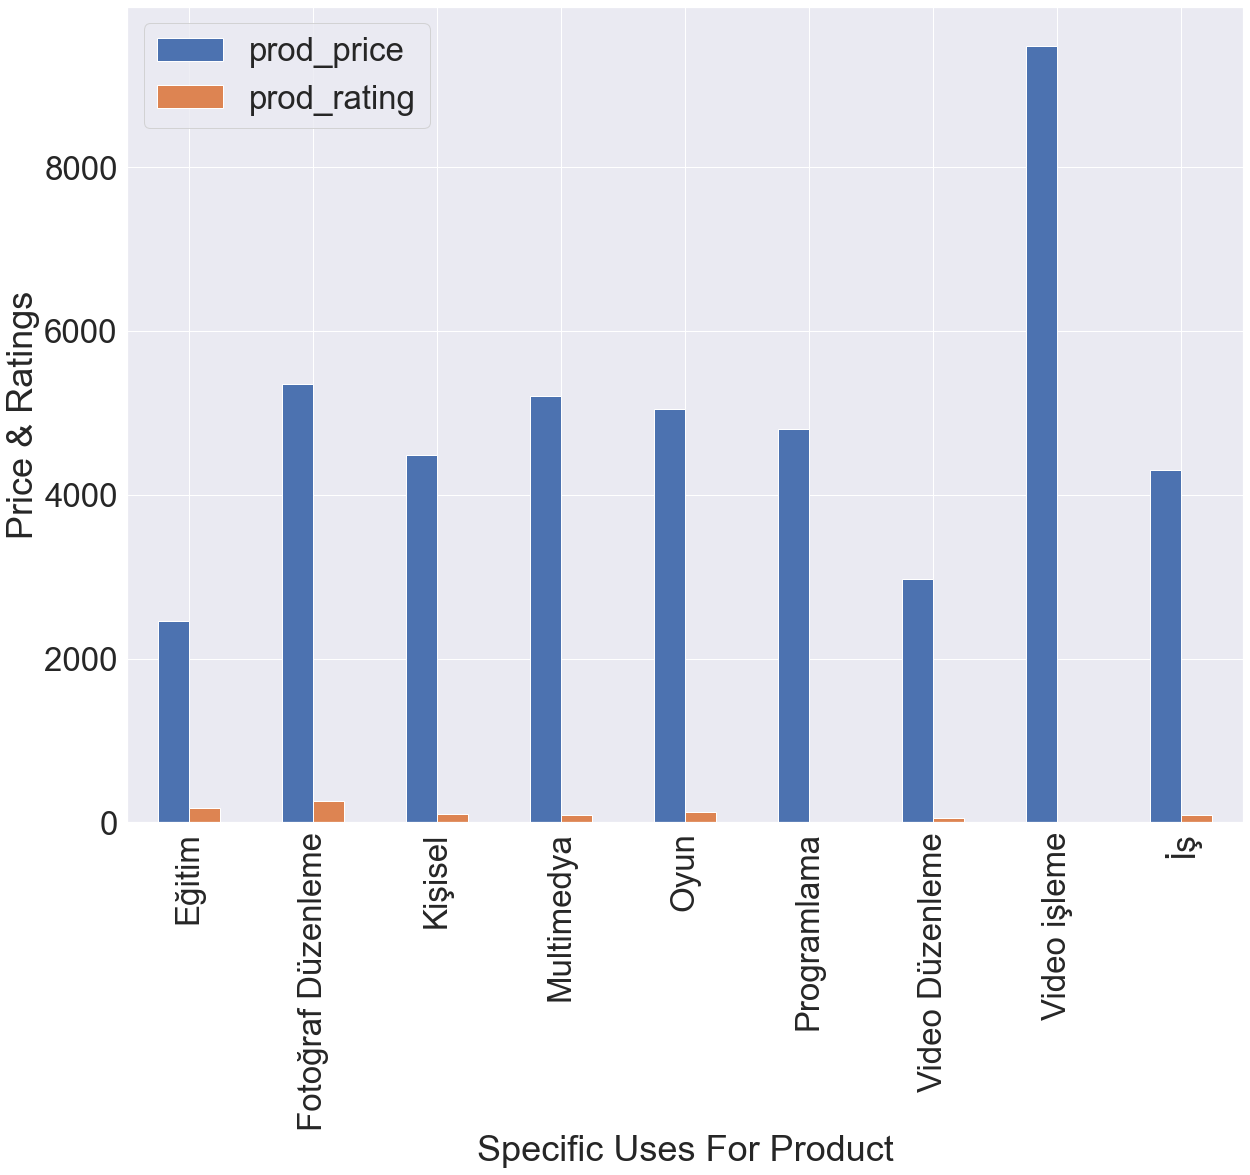

In [447]:
df_group_fea.plot(kind='bar',ylabel='Price & Ratings',xlabel='Specific Uses For Product',figsize=(20, 15))

In [434]:
df.head()

,prod_name,prod_comp,prod_price,prod_rating,prod_feature
0,"MSI 23.8"" OPTIX G241 Gaming Monitör, F...",Marka: MSI,2597.40,617.0,Oyun
1,Samsung LF24T350FHRXUF 24 inç 75 Hz FH...,Marka: Samsung,1713.80,2.0,Oyun
2,"LG 29WL500-B, 29'', 21:9, UltraGeniş, ...",Marka: LG,2761.74,91.0,Kişisel
3,"LG 27GL63T-B.APD, 27'' UltraGear, 1ms(...",Marka: LG,2829.01,19.0,Kişisel
4,"LG 27ML600M-B: 27'', IPS, FHD, Çift HD...",Marka: LG,2096.90,72.0,Kişisel


In [443]:
df_group_comp =df.groupby('prod_comp').mean()

In [444]:
df_group_comp

,prod_price,prod_rating
prod_comp,,
Marka: AOC,4529.322500,98.075313
Marka: ASUS,5207.149565,134.485478
Marka: Acer,4370.206875,92.875000
Marka: BenQ,4343.385714,120.307429
Marka: Cocar,2630.030000,25.000000
Marka: Dell,4601.937500,110.250000
Marka: Diğer,4447.640000,99.965019
Marka: GIGABYTE,3967.555000,138.750000
Marka: HANNSPREE,5200.857143,70.571429


<AxesSubplot:xlabel='Brand', ylabel='Price & Ratings'>

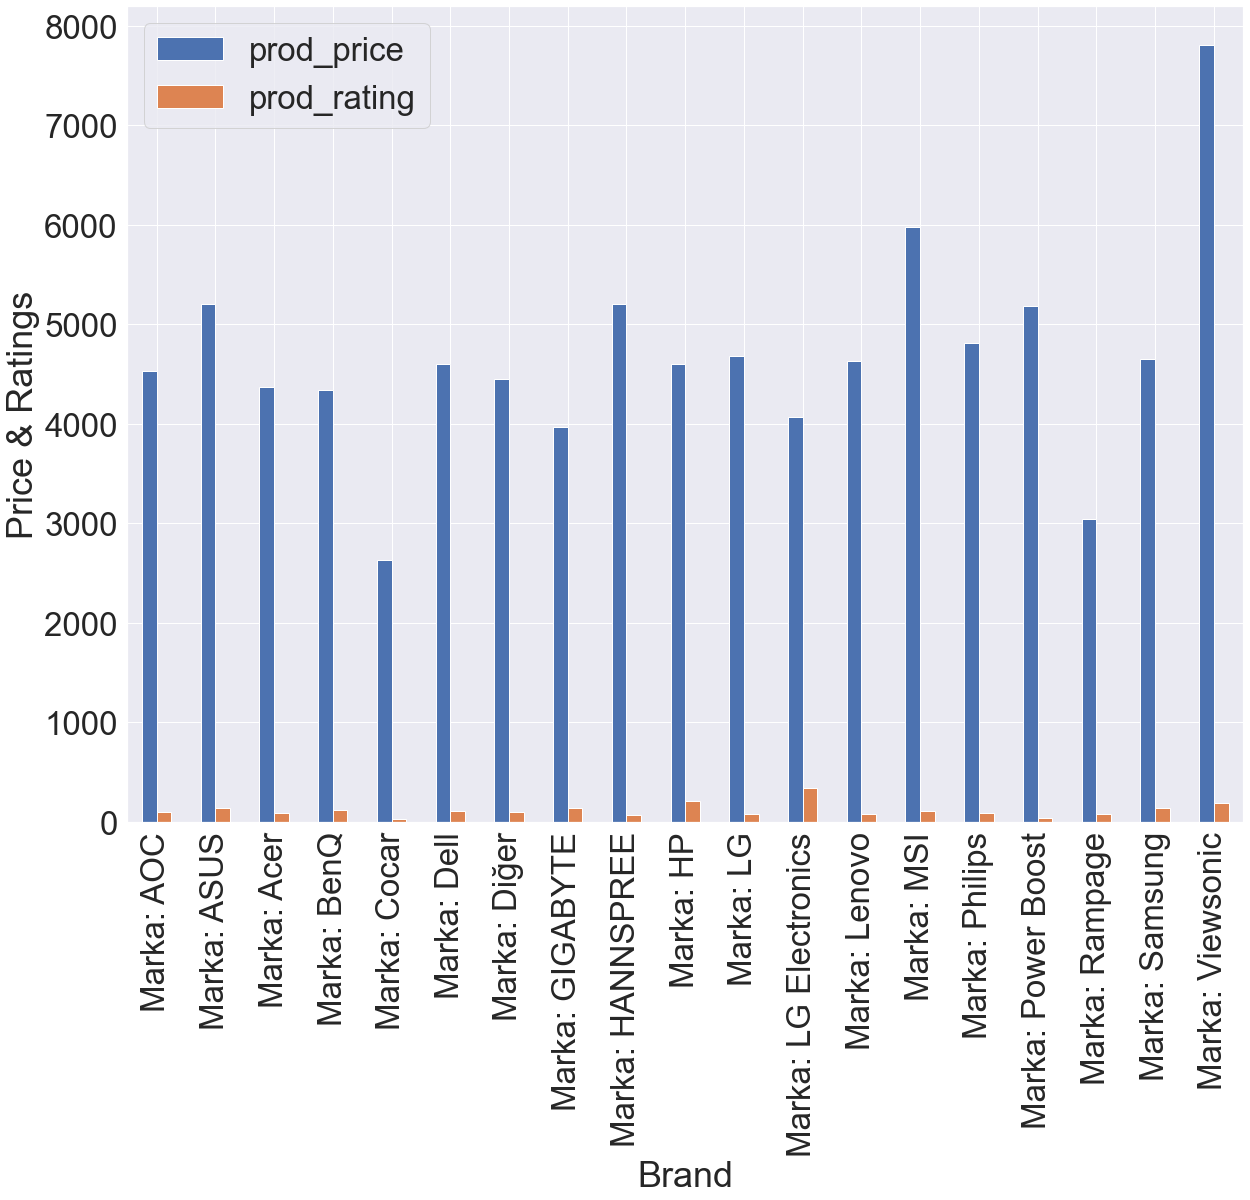

In [446]:
df_group_comp.plot(kind='bar',ylabel='Price & Ratings',xlabel='Brand',figsize=(20, 15))